**Chlorophyll-a UNET Model Architecture**

*Author: Purnima Panda*

*Version: v1.0*

*Language: Python*

***Before going to the main code , you have to download required library.***

Add it directly from the github library. 
`   `

Or Follow these steps given below.

*Create a file named `requirements.txt` with the following content:*

tensorflow==2.13.0

opencv-python-headless==4.7.0.72

numpy==1.24.3

matplotlib==3.7.1

scikit-learn==1.2.2

Follow these steps to set up your Python environment and install the required libraries:

1. *Install Python:*

    Ensure you have Python installed on your system. You can download and install it from `python.org`.

2. *Create a Virtual Environment:*

    It's good practice to create a virtual environment for your project to manage dependencies. You can create a virtual environment using venv:
    `python -m venv unet-env`

3. *Activate the Virtual Environment:*

    Activate the virtual environment. The command varies based on your operating system:

    Windows:
    ` .\unet-env\Scripts\activate `


    macOS and Linux:
    ` source unet-env/bin/activate `

4. *Install the Required Libraries:*

    Use the requirements.txt file to install the necessary libraries:

    `pip install -r requirements.txt`

If you have already installed the requirements.txt then,
Verify the Installation:

You can verify that the libraries are installed correctly by running the following Python commands:

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print("All libraries imported successfully!")

**UNET Model Explanation:**

-> *U-Net Model Definition:* The unet_model function defines the U-Net architecture.

-> *Load and Resize Image:* The input image is loaded and resized to match the input size of the model.

-> *Load Trained Model:* Load the trained U-Net model weights (if available) otherwise train it. Here we are assuming we have no trained model.

-> *Predict Chlorophyll-a Mask:* The model predicts the chlorophyll-a mask for the input image.

-> *Plot Results:* The original image and the predicted mask are plotted side by side.

-> *Calculate and Print Percentage:* The percentage of the area covered by chlorophyll-a is calculated and printed.

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from glob import glob

# Define the U-Net model
def unet_model(input_size=(256, 256, 3)):   # we are taking 3 channels
    inputs = Input(input_size)
    
    # Downsample
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Upsample
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


Assuming you have not trained model. So we will train the model. If you have trained model then just skip the below code snipet

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 4.3602 - accuracy: 1.3733e-04

c:\USERS\DELL\ONEDRIVE\DESKTOP\RELAX AI BOT\AIENV\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 7s 7s/step - loss: 4.3602 - accuracy: 1.3733e-04 - val_loss: 25327.2031 - val_accuracy: 0.1695
Epoch 2/50
1/1 [==============================] - 4s 4s/step - loss: 21786.5410 - accuracy: 0.1420 - val_loss: 20.9923 - val_accuracy: 0.1695
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 18.9938 - accuracy: 0.1420 - val_loss: 4.8392 - val_accuracy: 0.1694
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 4.3853 - accuracy: 0.1420 - val_loss: 1.3787 - val_accuracy: 0.0124
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 1.0971 - accuracy: 0.0102 - val_loss: 1.4710 - val_accuracy: 0.0103
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 1.1199 - accuracy: 0.0083 - val_loss: 1.2511 - val_accuracy: 0.1553
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 1.2353 - accuracy: 0.1395 - val_loss: 15.0610 - val_accuracy: 9.9182e-04
Epoch 8/50
1/1 [=================

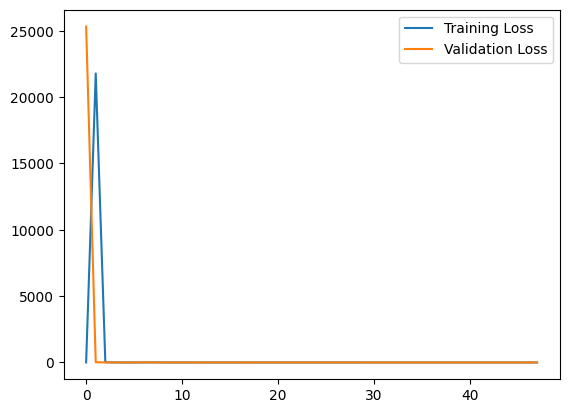

In [4]:
#Train the model

# Load and preprocess the dataset
def load_images_and_masks(image_paths, mask_paths, image_size=(256, 256)):
    images = []
    masks = []
    
    for img_path, mask_path in zip(image_paths, mask_paths):
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, image_size)
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, image_size)
        mask = mask / 255.0
        
        images.append(image)
        masks.append(mask)
    
    return np.array(images), np.array(masks)

# Paths to your dataset
image_dir = r'C:\Users\Dell\OneDrive\Desktop\Pythonl\UNET_Chloroplhyll-a\images' 
# Replace with our actual path of image directory
mask_dir = r'C:\Users\Dell\OneDrive\Desktop\Pythonl\UNET_Chloroplhyll-a\masks'   
# Replace with our actual path of mask directory

#both images in .png format
image_paths = sorted(glob(os.path.join(image_dir, '*.png')))
mask_paths = sorted(glob(os.path.join(mask_dir, '*.png')))

# Load and preprocess data
X, Y = load_images_and_masks(image_paths, mask_paths)
Y = np.expand_dims(Y, axis=-1)  # Add channel dimension

# Check if the dataset is large enough to split
if len(X) > 1:
    # Split the data into training and validation sets
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
else:
    # Use the entire dataset for training if it's too small to split
    X_train, X_val, Y_train, Y_val = X, X, Y, Y

# Define the U-Net model
model = unet_model()

# Set up callbacks
checkpoint = ModelCheckpoint('unet_chlorophyll.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=16, callbacks=[checkpoint, early_stopping])

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

After sucessfull training of the model , next step is to find the chlorophyll-a percentage and print chlorophyll-a map.
Before that ensure you have trained model. 
Here we load the model ` unet_chlorophyll.h5 ` which we tarined on above code snipet. You can replace it your own pre-trained model.

1/1 [==============================] - 1s 909ms/step


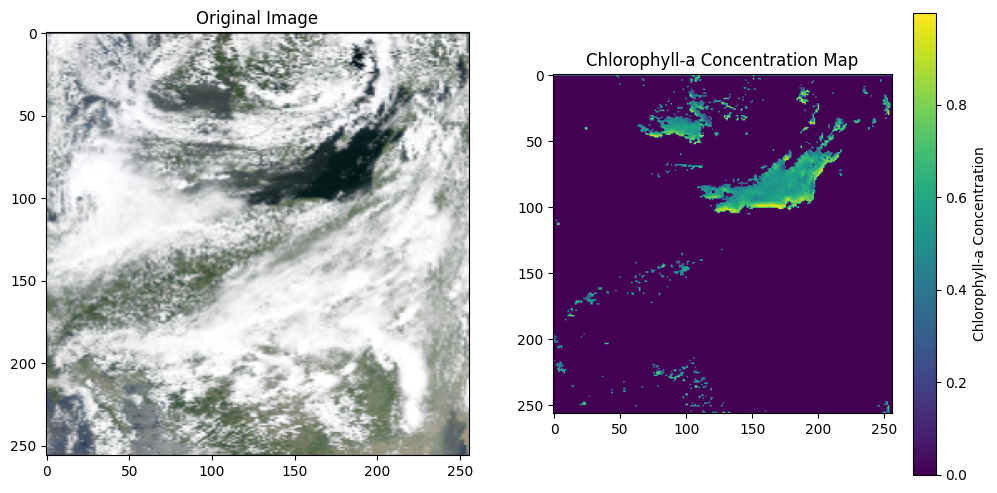

In [5]:
# Load the trained model weights
model.load_weights('unet_chlorophyll.h5')

# Function to generate and save chlorophyll-a concentration map
def generate_chlorophyll_map(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (256, 256))
    
    # Predict chlorophyll-a mask
    prediction = model.predict(np.expand_dims(image_resized, axis=0))[0]
    chlorophyll_map = prediction.squeeze()
    
    return image_resized, chlorophyll_map

# Function to create a water mask based on RGB thresholds
def create_water_mask(image, rgb_thresholds=(100, 100, 100)):
    lower = np.array([0, 0, 0])
    upper = np.array(rgb_thresholds)
    mask = cv2.inRange(image, lower, upper)
    return mask

# Function to apply water mask to chlorophyll map
def apply_water_mask(chlorophyll_map, water_mask):
    water_mask_resized = cv2.resize(water_mask, (chlorophyll_map.shape[1], chlorophyll_map.shape[0]))
    return chlorophyll_map * (water_mask_resized > 0)

# Generate and save chlorophyll-a concentration map for a given ocean image
ocean_image_path = r"C:\Users\Dell\OneDrive\Desktop\Pythonl\UNET_Chloroplhyll-a\images\A2024162122000.L1B_LAC_BRS.png"
image, chlorophyll_map = generate_chlorophyll_map(ocean_image_path, model)

# Create a water mask
water_mask = create_water_mask(image, rgb_thresholds=(100, 100, 100))

# Apply the water mask to the chlorophyll map
chlorophyll_map_water_only = apply_water_mask(chlorophyll_map, water_mask)

# Plot the original image and the chlorophyll-a concentration map for water areas only
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(chlorophyll_map_water_only, cmap='viridis')
ax[1].set_title('Chlorophyll-a Concentration Map')
plt.colorbar(ax[1].imshow(chlorophyll_map_water_only, cmap='viridis'), ax=ax[1], label='Chlorophyll-a Concentration')
plt.show()